In [11]:
import pandas
import yfinance as yfin

yfin.pdr_override()

from pandas_datareader import data as pdr

spy = pdr.get_data_yahoo('SPY', start="2022-9-23", end="2022-10-24")

print(spy)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-23  370.579987  370.619995  363.290009  367.950012  366.268097   
2022-09-26  366.410004  370.209991  363.029999  364.309998  362.644714   
2022-09-27  368.019989  370.399994  360.869995  363.380005  361.718994   
2022-09-28  364.380005  372.299988  362.600006  370.529999  368.836304   
2022-09-29  366.809998  367.109985  359.700012  362.790009  361.131683   
2022-09-30  361.799988  365.910004  357.040009  357.179993  355.547302   
2022-10-03  361.079987  368.549988  359.209991  366.609985  364.934204   
2022-10-04  372.399994  378.000000  366.570007  377.970001  376.242279   
2022-10-05  373.390015  379.459991  370.950012  377.089996  375.366302   
2022-10-06  375.619995  378.720001  372.679993  373.200012  371.494110   
2022-10-07  368.970001  373.290009  360.940

<AxesSubplot:xlabel='Date'>

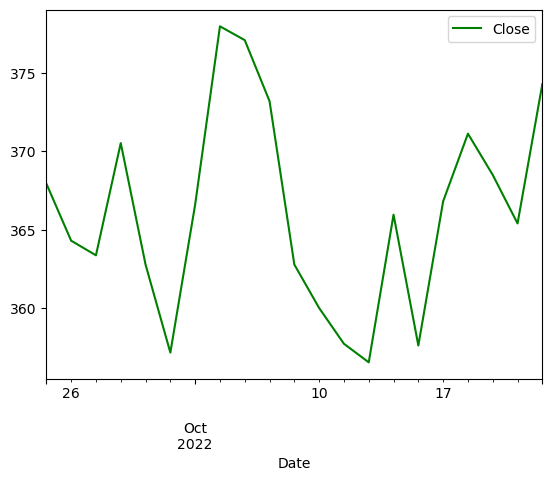

In [12]:
spy.plot(y="Close", color="Green")

In [22]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

<AxesSubplot:xlabel='Date'>

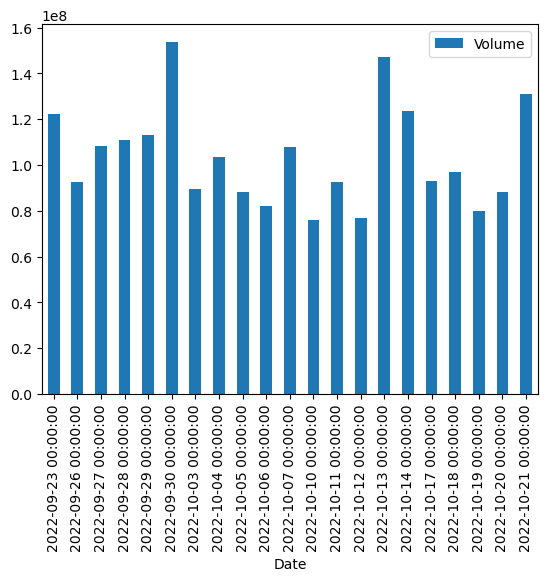

In [24]:
spy.plot.bar(y="Volume")

In [27]:
import numpy as np

a = np.array([[1, 2], [3, 4], [5, 6]], dtype=np.float64)

print(a.size)

6
